In [34]:
pwd

'/ghds/groups/labdesk/bshih'

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [36]:
fc_id = '201104_NB552398_0038_AHHGYVBGXG'
RBP = ['RBP200101Z101',
       'RBP200101Z100',
       'RBP200828A125']

wells = pd.read_csv(f'/ghds/cv19/analysis/{fc_id}/c19_call.hdr.tsv', sep='\t')

well_position = []
well_RBP = []
for _, value in wells['pos_tube_rack'].items():
    well_RBP.append(value[:13])
    well_position.append(value[14:])
    
wells['well_position'] = well_position
wells['RBP'] = well_RBP
wells = wells[wells['RBP'].isin(RBP)].sort_values(by='well_position')

In [37]:
delete_rows = "(A|B)"
filtered = wells['well_position'].str.contains(delete_rows)
wells = wells[~filtered]

/home/bshih/miniconda3/envs/g19_analysis/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [88]:
copies_500 = "(C|D)"
copies_200 = "(E|F)"
copies_100 = "(G|H)"

copy500 = wells[wells['well_position'].str.contains(copies_500)].sort_values(by='RBP')
copy200 = wells[wells['well_position'].str.contains(copies_200)].sort_values(by='RBP')
copy100 = wells[wells['well_position'].str.contains(copies_100)].sort_values(by='RBP')
conditions = [copy500, copy200, copy100]
Cond = ['500 Copies = 2500 Copies/mL (20x LOD)', 
        '200 Copies = 1000 Copies/mL (8x LOD)', 
        '100 Copies = 500 Copies/mL (4x LOD)']

copy500

/home/bshih/miniconda3/envs/g19_analysis/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,runid,run_sample_id,sample_type,pos_tube_rack,parameter_set,replicates_count,replicates_detected,replicates_not_detected,replicates_no_call,median_covid_ratio,call,flags,well_position,RBP
598,201104_NB552398_0038_AHHGYVBGXG,4052445052,Sample,RBP200101Z100:C1,Guardant19-RTPCR,3,0,3,0,0.00000,not_detected,pass,C1,RBP200101Z100
610,201104_NB552398_0038_AHHGYVBGXG,4052445064,Sample,RBP200101Z100:D1,Guardant19-RTPCR,3,0,3,0,0.00000,not_detected,pass,D1,RBP200101Z100
605,201104_NB552398_0038_AHHGYVBGXG,4052445059,Sample,RBP200101Z100:C8,Guardant19-RTPCR,3,1,2,0,0.00000,not_detected,pass,C8,RBP200101Z100
619,201104_NB552398_0038_AHHGYVBGXG,4052445073,Sample,RBP200101Z100:D10,Guardant19-RTPCR,3,1,2,0,0.00000,not_detected,pass,D10,RBP200101Z100
604,201104_NB552398_0038_AHHGYVBGXG,4052445058,Sample,RBP200101Z100:C7,Guardant19-RTPCR,3,0,3,0,0.00000,not_detected,pass,C7,RBP200101Z100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,201104_NB552398_0038_AHHGYVBGXG,4052438065,Sample,RBP200828A125:D10,Guardant19-RTPCR,3,3,0,0,0.33595,detected,pass,D10,RBP200828A125
413,201104_NB552398_0038_AHHGYVBGXG,4052438051,Sample,RBP200828A125:C8,Guardant19-RTPCR,3,3,0,0,0.28397,detected,pass,C8,RBP200828A125
418,201104_NB552398_0038_AHHGYVBGXG,4052438056,Sample,RBP200828A125:D1,Guardant19-RTPCR,3,3,0,0,0.24604,detected,pass,D1,RBP200828A125
421,201104_NB552398_0038_AHHGYVBGXG,4052438059,Sample,RBP200828A125:D4,Guardant19-RTPCR,3,3,0,0,0.23649,detected,pass,D4,RBP200828A125


/home/bshih/miniconda3/envs/g19_analysis/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/bshih/miniconda3/envs/g19_analysis/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bshih/miniconda3/envs/g19_analysis/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bshih/miniconda3/envs/g19_analysis/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bshih/miniconda3/env

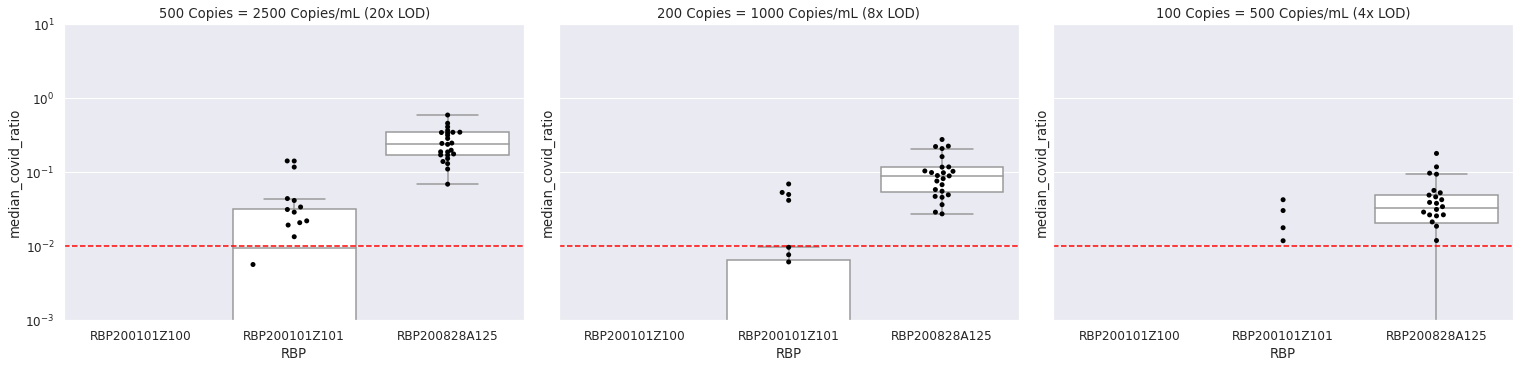

In [92]:
copies_500 = "(C|D)"
copies_200 = "(E|F)"
copies_100 = "(G|H)"

copy500 = wells[wells['well_position'].str.contains(copies_500)].sort_values(by='RBP')
copy200 = wells[wells['well_position'].str.contains(copies_200)].sort_values(by='RBP')
copy100 = wells[wells['well_position'].str.contains(copies_100)].sort_values(by='RBP')
conditions = [copy500, copy200, copy100]
Cond = ['500 Copies = 2500 Copies/mL (20x LOD)', 
        '200 Copies = 1000 Copies/mL (8x LOD)', 
        '100 Copies = 500 Copies/mL (4x LOD)']

total_cols = 3
total_rows = 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, sharex=True, sharey=True,
                        figsize=(7*total_cols, 5*total_rows), constrained_layout=True, squeeze=False)

for i,j,k in zip(conditions, Cond, range(len(Cond))): 
    row = k//total_cols
    pos = k % total_cols
    g = sns.boxplot(x="RBP", y="median_covid_ratio", data=i, showfliers = False, color='w', ax=axs[row][pos])
    g = sns.swarmplot(x="RBP", y="median_covid_ratio", data=i, color='black', size=5, ax=axs[row][pos])
    g.set_yscale('log')
    axs[row][pos].set(ylim=(0.001, 10))
    axs[row][pos].axhline(0.01, ls='--', color='red')
    axs[row][pos].set_title(f'{j}')
    
plt.show()

In [31]:
copies_500 = "(C|D)"
copies_200 = "(E|F)"
copies_100 = "(G|H)"

copy500 = wells['well_position'].str.contains(copies_500)
copy200 = wells['well_position'].str.contains(copies_200)
copy100 = wells['well_position'].str.contains(copies_100)
conditions = [copy500, copy200, copy100]

for i in conditions:
    for j in RBP:
        print(j)
        print(wells[i][wells['RBP'] == j]['call'].value_counts().to_string(), '\n')

RBP200101Z101
detected        12
not_detected    12 

RBP200101Z100
not_detected    24 

RBP200828A125
detected    24 

RBP200101Z101
not_detected    20
detected         4 

RBP200101Z100
not_detected    24 

RBP200828A125
detected    24 

RBP200101Z101
not_detected    20
detected         4 

RBP200101Z100
not_detected    24 

RBP200828A125
detected        20
not_detected     4 



/home/bshih/miniconda3/envs/g19_analysis/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/bshih/miniconda3/envs/g19_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [87]:
pool_stats = pd.read_csv('/ghds/cv19/analysis/201114_NB552398_0043_AHH5YCBGXG/c19_read_counts.hdr.tsv', sep='\t')
pool_stats.dropna(inplace=True)
pool_stats[pool_stats['pos_extraction'].str.contains('RPC201016A')]


,runid,run_sample_id,sample_type,parameter_set,index,barcode,covid_count,rnase_count,spikein_count,unknown,covid_ratio,replicate_call,replicate_flags,barcode_pair_origin,partial_fwd,partial_rev,pos_tube_rack,pos_extraction,pos_pooling,barcode_pair_label
238,201114_NB552398_0043_AHH5YCBGXG,HBH0021,Sample,Guardant19-RTPCR,GACTGATA_AATACCGT,ATCCTCGAAG_CAACGACATA,0,11757,60461,1804,0.00000,not_detected,pass,current_pool,1237,432,RBP201022A118:A11,RPC201016A006:A11,PRP200924A046:E1,plate3:A11
242,201114_NB552398_0043_AHH5YCBGXG,HC80796,Sample,Guardant19-RTPCR,GACTGATA_AATACCGT,ATGATGGACC_TAGTGACTAC,0,14702,47263,332,0.00000,not_detected,pass,current_pool,1098,375,RBP201022A118:H7,RPC201016A006:H7,PRP200924A046:E1,plate3:H07
245,201114_NB552398_0043_AHH5YCBGXG,HC80485,Sample,Guardant19-RTPCR,GACTGATA_AATACCGT,ATAGATGCGG_ATGAGAGCTC,0,12035,61336,2687,0.00000,not_detected,pass,current_pool,1624,315,RBP201022A118:E4,RPC201016A006:E4,PRP200924A046:E1,plate3:E04
251,201114_NB552398_0043_AHH5YCBGXG,HC30233,Sample,Guardant19-RTPCR,GACTGATA_AATACCGT,AAGACCGAGC_ACACTGTCTG,0,11110,41818,4808,0.00000,not_detected,pass,current_pool,772,195,RBP201022A118:H8,RPC201016A006:H8,PRP200924A046:E1,plate3:H08
253,201114_NB552398_0043_AHH5YCBGXG,HC80241,Sample,Guardant19-RTPCR,GACTGATA_AATACCGT,GAAGTGGCCT_ATGGCTGTGT,0,10837,70187,3189,0.00000,not_detected,pass,current_pool,1563,338,RBP201022A118:C7,RPC201016A006:C7,PRP200924A046:E1,plate3:C07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,201114_NB552398_0043_AHH5YCBGXG,N2008260912,NTC,Guardant19-RTPCR,GCATGTCG_CTAGTCGT,ACATAGCGAG_GATCCGACAG,0,0,62934,1718,0.00000,not_detected,pass,current_pool,12862,205,RBP201022A025:A1,RPC201016A142:A1,PRP200924A046:C5,plate3:A01
7412,201114_NB552398_0043_AHH5YCBGXG,P2008200011,Positive,Guardant19-RTPCR,GCATGTCG_CTAGTCGT,GACTGTTCCT_CGTCCTTGTT,54428,0,90203,106,0.60339,detected,pass,current_pool,2230,606,RBP201022A025:B1,RPC201016A142:B1,PRP200924A046:C5,plate3:B01
7753,201114_NB552398_0043_AHH5YCBGXG,Ht01956,Sample,Guardant19-RTPCR,CTAACGTT_AAACCAGG,GCATGGTTAT_TCACCGATGG,0,0,29533,65,0.00000,no_call,low_rnase,current_pool,415,148,RBP201022A116:C1,RPC201016A141:C1,PRP200924A046:G4,plate3:C01
7913,201114_NB552398_0043_AHH5YCBGXG,N2008260885,NTC,Guardant19-RTPCR,CTAACGTT_AAACCAGG,ACATAGCGAG_GATCCGACAG,0,0,57462,2806,0.00000,not_detected,pass,current_pool,1362,246,RBP201022A116:A1,RPC201016A141:A1,PRP200924A046:G4,plate3:A01


In [17]:
read_counts = pd.read_csv('/ghds/cv19/analysis/201104_NB552398_0038_AHHGYVBGXG/c19_read_counts.hdr.tsv', sep='\t')
A168 = '(PRP200924A036:D1|PRP200924A036:E1|PRP200924A036:F1)'
A168_df = read_counts[read_counts['pos_pooling'].str.contains(A168)].dropna()

primer_plate = [value[:13] for _,value in A168_df['pos_extraction'].items()]
row = [value[14] for _,value in A168_df['pos_extraction'].items()]
column = [int(value[15:]) for _,value in A168_df['pos_extraction'].items()]
A168_df['primer_plate'] = primer_plate
A168_df['row'] = row
A168_df['column'] = column
A168_df.sort_values(by='column')

/home/bshih/miniconda3/envs/g19_analysis/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,runid,run_sample_id,sample_type,parameter_set,index,barcode,covid_count,rnase_count,spikein_count,unknown,...,barcode_pair_origin,partial_fwd,partial_rev,pos_tube_rack,pos_extraction,pos_pooling,barcode_pair_label,primer_plate,row,column
5248,201104_NB552398_0038_AHHGYVBGXG,P2008210135,Positive,Guardant19-RTPCR,AACAGACG_CTGTGTTG,TCAAGCAACG_CGGATTGAAC,0,0,0,1,...,current_pool,1,0,RBP200828A168:B1,RPB201016A057:B1,PRP200924A036:F1,plate5:A05,RPB201016A057,B,1
5006,201104_NB552398_0038_AHHGYVBGXG,4052442112,Sample,Guardant19-RTPCR,ATTAGCCG_GGGTCTCG,GGTACTTCAG_GTAGTAGTAC,0,0,0,0,...,current_pool,0,0,RBP200828A168:F1,RPD201016A150:F1,PRP200924A036:D1,plate5:F01,RPD201016A150,F,1
5018,201104_NB552398_0038_AHHGYVBGXG,4052442124,Sample,Guardant19-RTPCR,ATTAGCCG_GGGTCTCG,AATACGAGCG_CAGTAGAGTT,0,0,1,0,...,current_pool,0,0,RBP200828A168:G1,RPD201016A150:G1,PRP200924A036:D1,plate5:G01,RPD201016A150,G,1
5030,201104_NB552398_0038_AHHGYVBGXG,4052442136,Sample,Guardant19-RTPCR,ATTAGCCG_GGGTCTCG,TCCGACATCT_CACAGTTAAG,0,0,0,0,...,current_pool,0,0,RBP200828A168:H1,RPD201016A150:H1,PRP200924A036:D1,plate4:H01,RPD201016A150,H,1
4982,201104_NB552398_0038_AHHGYVBGXG,4052442088,Sample,Guardant19-RTPCR,ATTAGCCG_GGGTCTCG,CATGACTTAG_GTCTATCATG,0,0,3,0,...,current_pool,0,0,RBP200828A168:D1,RPD201016A150:D1,PRP200924A036:D1,plate5:D01,RPD201016A150,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,201104_NB552398_0038_AHHGYVBGXG,4052442075,Sample,Guardant19-RTPCR,ATTAGCCG_GGGTCTCG,AAGCTGGTAT_AGAGAGTCGT,0,0,3,0,...,current_pool,0,0,RBP200828A168:B12,RPD201016A150:B12,PRP200924A036:D1,plate5:B12,RPD201016A150,B,12
5220,201104_NB552398_0038_AHHGYVBGXG,4052442123,Sample,Guardant19-RTPCR,AACAGACG_CTGTGTTG,CTAACACCTT_TCAACCATGA,0,0,4,0,...,current_pool,0,0,RBP200828A168:F12,RPB201016A057:F12,PRP200924A036:F1,plate2:F12,RPB201016A057,F,12
5145,201104_NB552398_0038_AHHGYVBGXG,4052442147,Sample,Guardant19-RTPCR,GACTGATA_AATACCGT,CGACAGAATG_CGAGATTCGA,0,0,0,0,...,current_pool,1,0,RBP200828A168:H12,RPA201016A029:H12,PRP200924A036:E1,plate1:H12,RPA201016A029,H,12
5131,201104_NB552398_0038_AHHGYVBGXG,4052442135,Sample,Guardant19-RTPCR,GACTGATA_AATACCGT,TGCTAAGCGG_ATCCTGCGGT,0,0,4,2,...,current_pool,5,0,RBP200828A168:G12,RPA201016A029:G12,PRP200924A036:E1,plate1:G12,RPA201016A029,G,12


/home/bshih/miniconda3/envs/g19_analysis/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


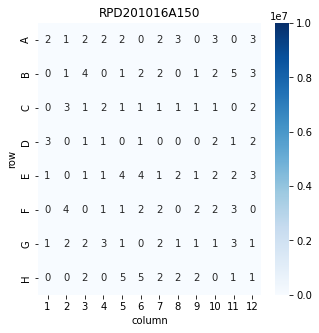

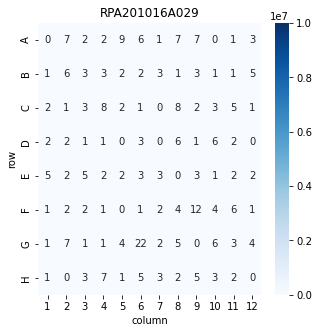

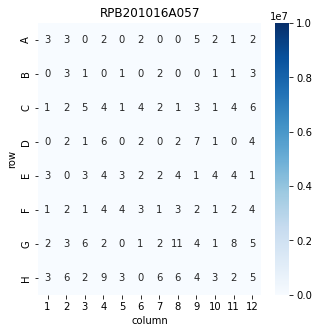

In [9]:
read_counts = pd.read_csv('/ghds/cv19/analysis/201104_NB552398_0038_AHHGYVBGXG/c19_read_counts.hdr.tsv', sep='\t')
A168 = '(PRP200924A036:D1|PRP200924A036:E1|PRP200924A036:F1)'
A168_df = read_counts[read_counts['pos_pooling'].str.contains(A168)].dropna()

primer_plate = [value[:13] for _,value in A168_df['pos_extraction'].items()]
row = [value[14] for _,value in A168_df['pos_extraction'].items()]
column = [int(value[15:]) for _,value in A168_df['pos_extraction'].items()]
A168_df['primer_plate'] = primer_plate
A168_df['row'] = row
A168_df['column'] = column

for i in A168_df['primer_plate'].unique():
    fig, ax = plt.subplots(figsize=(5, 5))
    temp = A168_df[A168_df['primer_plate'] == i].sort_values(by='column').pivot(index='row', columns='column', values='spikein_count')
    sns.heatmap(temp, annot=True, cmap='Blues', fmt='d', vmax=10000000)
    plt.title(f'{i}')
    plt.show()

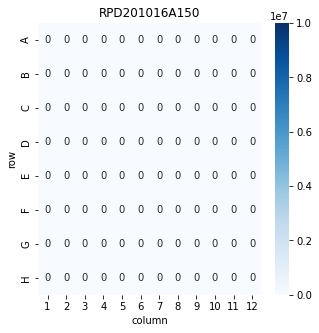

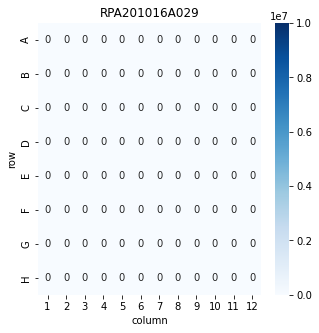

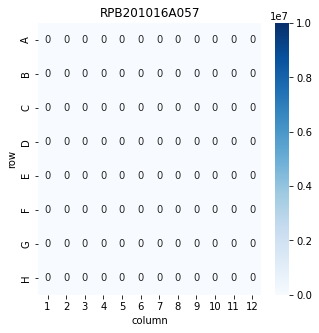

In [19]:
for i in A168_df['primer_plate'].unique():
    temp = A168_df[A168_df['primer_plate'] == i].pivot(index='row', columns='column', values='covid_count')
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(temp, annot=True, cmap='Blues', fmt='d', vmax=10000000)
    plt.title(f'{i}')
    plt.show()

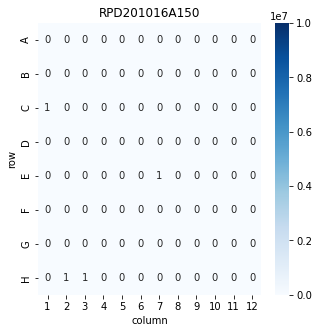

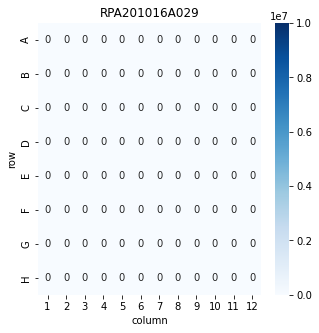

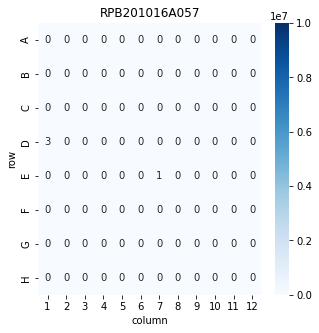

In [20]:
for i in A168_df['primer_plate'].unique():
    temp = A168_df[A168_df['primer_plate'] == i].pivot(index='row', columns='column', values='rnase_count')
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(temp, annot=True, cmap='Blues', fmt='d', vmax=10000000)
    plt.title(f'{i}')
    plt.show()